## **Problem Statement & Motivations**
Airbnb, a leading lodging platform with millions of unique listings worldwide, captures our interest as Boston University students, particularly for its Boston area listings. Our project aims to tackle challenges of deciphering the factors that contribute to a listing's success and understanding the natural grouping using unsupervised machine learning. By analyzing the extensive and diverse dataset, we seek to uncover patterns and trends that can inform better decision-making for hosts and improve the overall experience for customers.

##**Dataset**
Dataset Source: http://insideairbnb.com/get-the-data/
We will be using “Listings” and “Reviews” tables from the Boston data section on the website, providing a thorough overview of Boston's Airbnb listings. It includes information on accommodation types, prices, descriptions, and reviews in addition to geographic data.

## **Load and peek at the data**

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [247]:
# df_listings = pd.read_csv('/content/drive/MyDrive/DataSet/listings.csv')
# df_reviews = pd.read_csv('/content/drive/MyDrive/DataSet/reviews.csv')

df_listings = pd.read_csv('/content/listings.csv')
df_reviews = pd.read_csv('/content/reviews.csv')
# df_listings = pd.read_csv('/content/drive/MyDrive/listings.csv')
# df_reviews = pd.read_csv('/content/drive/MyDrive/reviews.csv')

for data in [df_listings,df_reviews]:
    display(data)
    print(data.shape)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20231218233145,2023-12-19,city scrape,Rental unit in Boston · ★4.96 · 1 bedroom · 1 ...,NaN,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20231218233145,2023-12-19,city scrape,Guest suite in Boston · ★4.79 · 1 bedroom · 1 ...,NaN,"Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,...,4.89,4.55,4.75,STR-490093,f,10,10,0,0,0.68
2,6695,https://www.airbnb.com/rooms/6695,20231218233145,2023-12-19,city scrape,Condo in Boston · ★4.81 · Studio · 2 beds · 1 ...,NaN,"Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,...,4.95,4.51,4.71,STR-491702,f,10,10,0,0,0.73
3,8789,https://www.airbnb.com/rooms/8789,20231218233145,2023-12-19,city scrape,Rental unit in Boston · ★4.67 · 1 bedroom · 1 ...,NaN,Beacon Hill is a historic neighborhood filled ...,https://a0.muscache.com/pictures/miso/Hosting-...,26988,...,4.96,4.96,4.56,NaN,f,9,9,0,0,0.24
4,10813,https://www.airbnb.com/rooms/10813,20231218233145,2023-12-19,city scrape,Rental unit in Boston · ★5.0 · Studio · 1 bed ...,NaN,Wander around this quintessential neighborhood...,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,...,5.00,5.00,4.80,NaN,f,11,11,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199,1046563598019556549,https://www.airbnb.com/rooms/1046563598019556549,20231218233145,2023-12-19,city scrape,Rental unit in Boston · ★New · 2 bedrooms · 3 ...,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,212359760,...,5.00,5.00,5.00,Exempt: This listing is a unit that has contra...,f,77,77,0,0,1.00
4200,1046568292864752336,https://www.airbnb.com/rooms/1046568292864752336,20231218233145,2023-12-19,city scrape,Rental unit in Boston · ★New · 1 bedroom · 3 b...,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,212359760,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN
4201,1047166785349446101,https://www.airbnb.com/rooms/1047166785349446101,20231218233145,2023-12-19,city scrape,Rental unit in Boston · ★New · 1 bedroom · 2 b...,NaN,"With its brownstones, Boston Marathon finish l...",https://a0.muscache.com/pictures/miso/Hosting-...,233908696,...,NaN,NaN,NaN,STR-531165,t,2,2,0,0,NaN
4202,1047226383263246733,https://www.airbnb.com/rooms/1047226383263246733,20231218233145,2023-12-19,city scrape,Rental unit in Boston · ★New · 2 bedrooms · 3 ...,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,212359760,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN


(4204, 75)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...
...,...,...,...,...,...,...
182477,1039150219616773193,1045693858976693752,2023-12-13,381198215,Gabrielle,A wonderful location to walk around the North ...
182478,1040527526059629043,1042105725677485453,2023-12-08,9723289,David & Whitley,Great deal and responsive hosts!
182479,1040634799097914803,1047144075583848904,2023-12-15,494876133,Dannieli,Our stay at Diego’s place was great!<br/>The a...
182480,1040634799097914803,1049339123694758332,2023-12-18,94199776,Maxim,Good place; solid bedrooms/bathrooms; nice to ...


(182482, 6)


In [248]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182482 entries, 0 to 182481
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     182482 non-null  int64 
 1   id             182482 non-null  int64 
 2   date           182482 non-null  object
 3   reviewer_id    182482 non-null  int64 
 4   reviewer_name  182481 non-null  object
 5   comments       182430 non-null  object
dtypes: int64(3), object(3)
memory usage: 8.4+ MB


In [249]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204 entries, 0 to 4203
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4204 non-null   int64  
 1   listing_url                                   4204 non-null   object 
 2   scrape_id                                     4204 non-null   int64  
 3   last_scraped                                  4204 non-null   object 
 4   source                                        4204 non-null   object 
 5   name                                          4204 non-null   object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         2742 non-null   object 
 8   picture_url                                   4204 non-null   object 
 9   host_id                                       4204 non-null   i

## **Data Preprocessing**

### **Check Null value for review cvs**

In [250]:
df_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     1
comments         52
dtype: int64

In the reviews dataset, which contains 182,482 data points, there are minimal instances of missing values—specifically, only 1 in "reviewer_name" and 52 in "comments." Given their negligible proportion, these records can be straightforwardly omitted from the analysis.

In [251]:
df_reviews.dropna(inplace = True)

In [252]:
df_reviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

### **Check Null value for listing cvs**

In [253]:
df_listings.describe(include='all')

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.204000e+03,4204,4.204000e+03,4204,4204,4204,0.0,2742,4204,4.204000e+03,...,3089.000000,3087.000000,3087.000000,2695,4204,4204.000000,4204.000000,4204.000000,4204.000000,3086.000000
unique,NaN,4204,NaN,2,2,1942,NaN,1453,4088,NaN,...,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/3781,NaN,2023-12-19,city scrape,Rental unit in Boston · 1 bedroom · 1 bed · 1 ...,NaN,This furnished apartment is situated in Back B...,https://a0.muscache.com/pictures/miso/Hosting-...,NaN,...,NaN,NaN,NaN,Exempt: This listing is a hotel or motel,f,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,4145,3588,311,NaN,65,6,NaN,...,NaN,NaN,NaN,286,3052,NaN,NaN,NaN,NaN,NaN
mean,3.944249e+17,NaN,2.023122e+13,NaN,NaN,NaN,NaN,NaN,NaN,1.614269e+08,...,4.813111,4.741542,4.573939,NaN,NaN,50.464320,42.151522,8.238344,0.018554,1.768240
std,4.329857e+17,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.552065e+08,...,0.394767,0.385061,0.503376,NaN,NaN,92.150512,91.476514,27.418919,0.172146,2.040877
min,3.781000e+03,NaN,2.023122e+13,NaN,NaN,NaN,NaN,NaN,NaN,4.804000e+03,...,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.921738e+07,NaN,2.023122e+13,NaN,NaN,NaN,NaN,NaN,NaN,2.234822e+07,...,4.810000,4.650000,4.470000,NaN,NaN,2.000000,1.000000,0.000000,0.000000,0.260000
50%,5.289384e+07,NaN,2.023122e+13,NaN,NaN,NaN,NaN,NaN,NaN,1.074344e+08,...,4.940000,4.860000,4.690000,NaN,NaN,8.000000,2.000000,0.000000,0.000000,1.010000
75%,8.389424e+17,NaN,2.023122e+13,NaN,NaN,NaN,NaN,NaN,NaN,2.758496e+08,...,5.000000,5.000000,4.860000,NaN,NaN,64.000000,34.000000,3.000000,0.000000,2.630000


In [254]:
missing_data = df_listings.isnull().sum()
missing_percentage = (missing_data / len(df_listings)) * 100

missing_df = pd.DataFrame({'missing_count': missing_data, 'missing_percentage': missing_percentage})
missing_df[missing_df['missing_count'] > 0].sort_values(by='missing_percentage', ascending=False)

,missing_count,missing_percentage
description,4204,100.000000
bathrooms,4204,100.000000
calendar_updated,4204,100.000000
bedrooms,4204,100.000000
neighbourhood_group_cleansed,4204,100.000000
license,1509,35.894386
neighborhood_overview,1462,34.776403
neighbourhood,1462,34.776403
host_about,1247,29.662226
last_review,1118,26.593720


In [255]:
df_listings.drop(columns=['description', 'bathrooms', 'calendar_updated', 'bedrooms', 'neighbourhood_group_cleansed'], inplace=True)

In [256]:
df_listings.drop(df_listings.columns[df_listings.columns.str.contains("url")],axis=1,inplace=True)

In [257]:
df_listings.drop(columns=['calculated_host_listings_count_shared_rooms','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','host_location','amenities','host_name','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','host_listings_count','host_total_listings_count','number_of_reviews_ltm','number_of_reviews_l30d','last_scraped','source','availability_30','availability_60','availability_90','calendar_last_scraped'], inplace=True)

In [258]:
df_listings['bathrooms'] = df_listings['bathrooms_text'].str.extract(r'(\d+\.?\d*)')[0].astype(float)
df_listings.loc[df_listings['bathrooms_text'].str.contains('half', na=False), 'bathrooms'] = 0.5 #

In [259]:
df_listings.drop(columns=['bathrooms_text'],inplace=True)

To ensure a focused and effective data processing environment, we simplified our dataset by removing any columns that are completely empty or that are considered irrelevant to our analytical goals.

In [260]:
import pandas as pd
from datetime import datetime

def convert_hyphens_to_slashes(input_string):
    return input_string.replace('-', '/')
# Convert the datetime column to string, apply the string replacement
df_listings['host_since'] = pd.to_datetime(df_listings['host_since']).dt.strftime('%Y-%m-%d').apply(convert_hyphens_to_slashes)

# Function to calculate the number of months since a given date until now
def calculate_months_since(date_str):
    current_time = datetime.now()
    date = datetime.strptime(date_str, '%Y/%m/%d')
    delta_years = current_time.year - date.year
    delta_months = current_time.month - date.month
    # Calculate the number of months difference, adjusting for days
    delta = delta_years * 12 + delta_months - (1 if current_time.day < date.day else 0)
    return delta

# Apply the function to each row in the 'host_since' column
df_listings['host_since_months'] = df_listings['host_since'].apply(calculate_months_since)

# Now you can view the DataFrame with the new column
df_listings[['host_since', 'host_since_months']]


,host_since,host_since_months
0,2008/12/03,182
1,2009/02/19,180
2,2009/02/19,180
3,2009/07/22,175
4,2009/09/16,173
...,...,...
4199,2018/08/29,65
4200,2018/08/29,65
4201,2019/01/02,61
4202,2018/08/29,65


In this step, we transform the "host_since" date into the number of months the host has been active up to the present day.

In [261]:
listings_to_drop = df_listings[(df_listings['has_availability'] == 'f') | (df_listings['has_availability'].isna())]['id']
listings_to_drop_list = listings_to_drop.tolist()
len(listings_to_drop_list)

356

Since, if the "has_availability" column is false, this will mean that the host is no longer hosting guests, and the data will be useless for us to analyze. So we decide to drop all false.

In [262]:
df_reviews = df_reviews[~df_reviews['listing_id'].isin(listings_to_drop_list)]

In [263]:
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

In [264]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204 entries, 0 to 4203
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4204 non-null   int64  
 1   scrape_id                       4204 non-null   int64  
 2   name                            4204 non-null   object 
 3   neighborhood_overview           2742 non-null   object 
 4   host_id                         4204 non-null   int64  
 5   host_since                      4204 non-null   object 
 6   host_about                      2957 non-null   object 
 7   host_response_time              3656 non-null   object 
 8   host_response_rate              3656 non-null   object 
 9   host_acceptance_rate            3711 non-null   object 
 10  host_is_superhost               4168 non-null   object 
 11  host_neighbourhood              4081 non-null   object 
 12  host_verifications              42

In [265]:
num_fill = df_listings.select_dtypes(include=['float64', 'int64']).columns
df_listings[num_fill] = df_listings[num_fill].fillna(df_listings[num_fill].median())

obj_fill = df_listings.select_dtypes(include=['object']).columns
for column in obj_fill:
    if df_listings[column].isnull().sum() / len(df_listings) < 0.2:  # If missing less than 20%, fill with most frequent value
        df_listings[column] = df_listings[column].fillna(df_listings[column].mode()[0])
    else:  # If missing more than 20%, consider adding a "Unknown" category
        df_listings[column] = df_listings[column].fillna("Unknown")

df_listings['reviews_per_month'] = df_listings['reviews_per_month'].fillna(0)

missing_data_final = df_listings.isnull().sum()
missing_data_final[missing_data_final > 0]

Series([], dtype: int64)

We handle missing values in the dataset by assigning the median to numerical columns and the most frequent value or a placeholder for categorical columns, depending on the proportion of data missing. Specifically, numerical missing values are replaced with the respective column's median, while categorical missing values are filled with the mode if they constitute less than 20% of the data, or marked as "Unknown" otherwise, with the 'reviews_per_month' column being set to zero where data is absent.

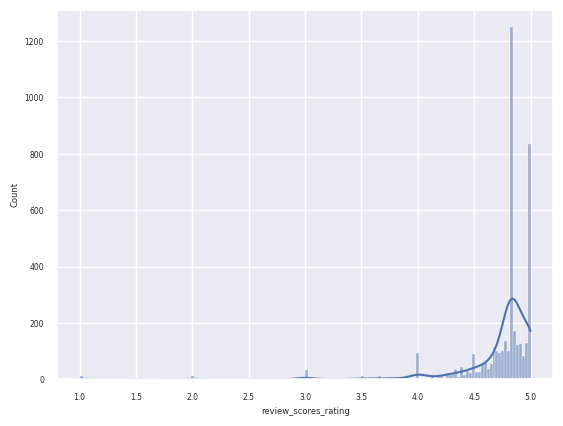

In [266]:
sns.histplot(df_listings['review_scores_rating'], kde=True)
plt.show()

In [267]:
threshold = df_listings['review_scores_rating'].quantile(0.70)
threshold

4.88

In [268]:
df_listings['highly_rated'] = df_listings['review_scores_rating'] >= threshold
df_listings

,id,scrape_id,name,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,reviews_per_month,bathrooms,host_since_months,highly_rated
0,3781,20231218233145,Rental unit in Boston · ★4.96 · 1 bedroom · 1 ...,"Mostly quiet ( no loud music, no crowed sidewa...",4804,2008/12/03,My wife and I and grown children frequently oc...,within a day,90%,29%,...,4.96,4.88,4.92,Unknown,f,1,0.23,1.0,182,True
1,5506,20231218233145,Guest suite in Boston · ★4.79 · 1 bedroom · 1 ...,"Peaceful, Architecturally interesting, histori...",8229,2009/02/19,"Relaxed, Easy going, Accommodating.",within an hour,100%,100%,...,4.89,4.55,4.75,STR-490093,f,10,0.68,1.0,180,False
2,6695,20231218233145,Condo in Boston · ★4.81 · Studio · 2 beds · 1 ...,"Peaceful, Architecturally interesting, histori...",8229,2009/02/19,"Relaxed, Easy going, Accommodating.",within an hour,100%,100%,...,4.95,4.51,4.71,STR-491702,f,10,0.73,1.0,180,False
3,8789,20231218233145,Rental unit in Boston · ★4.67 · 1 bedroom · 1 ...,Beacon Hill is a historic neighborhood filled ...,26988,2009/07/22,I manage a number of furnished units around Bo...,within a day,90%,50%,...,4.96,4.96,4.56,Unknown,f,9,0.24,1.0,175,False
4,10813,20231218233145,Rental unit in Boston · ★5.0 · Studio · 1 bed ...,Wander around this quintessential neighborhood...,38997,2009/09/16,Unknown,within an hour,98%,46%,...,5.00,5.00,4.80,Unknown,f,11,0.09,1.0,173,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199,1046563598019556549,20231218233145,Rental unit in Boston · ★New · 2 bedrooms · 3 ...,Unknown,212359760,2018/08/29,Whether you are just getting away for the week...,within an hour,100%,98%,...,5.00,5.00,5.00,Exempt: This listing is a unit that has contra...,f,77,1.00,1.0,65,True
4200,1046568292864752336,20231218233145,Rental unit in Boston · ★New · 1 bedroom · 3 b...,Unknown,212359760,2018/08/29,Whether you are just getting away for the week...,within an hour,100%,98%,...,4.94,4.86,4.69,Exempt: This listing is a unit that has contra...,f,77,1.01,1.0,65,False
4201,1047166785349446101,20231218233145,Rental unit in Boston · ★New · 1 bedroom · 2 b...,"With its brownstones, Boston Marathon finish l...",233908696,2019/01/02,Hello! We are Airbnb Queen! We started hosting...,within an hour,94%,100%,...,4.94,4.86,4.69,STR-531165,t,2,1.01,1.0,61,False
4202,1047226383263246733,20231218233145,Rental unit in Boston · ★New · 2 bedrooms · 3 ...,Unknown,212359760,2018/08/29,Whether you are just getting away for the week...,within an hour,100%,98%,...,4.94,4.86,4.69,Exempt: This listing is a unit that has contra...,f,77,1.01,2.0,65,False


We set the 70% as the threshold, and find whether each listing's rating meets or exceeds this threshold.

### **Check outliers for listing csv**

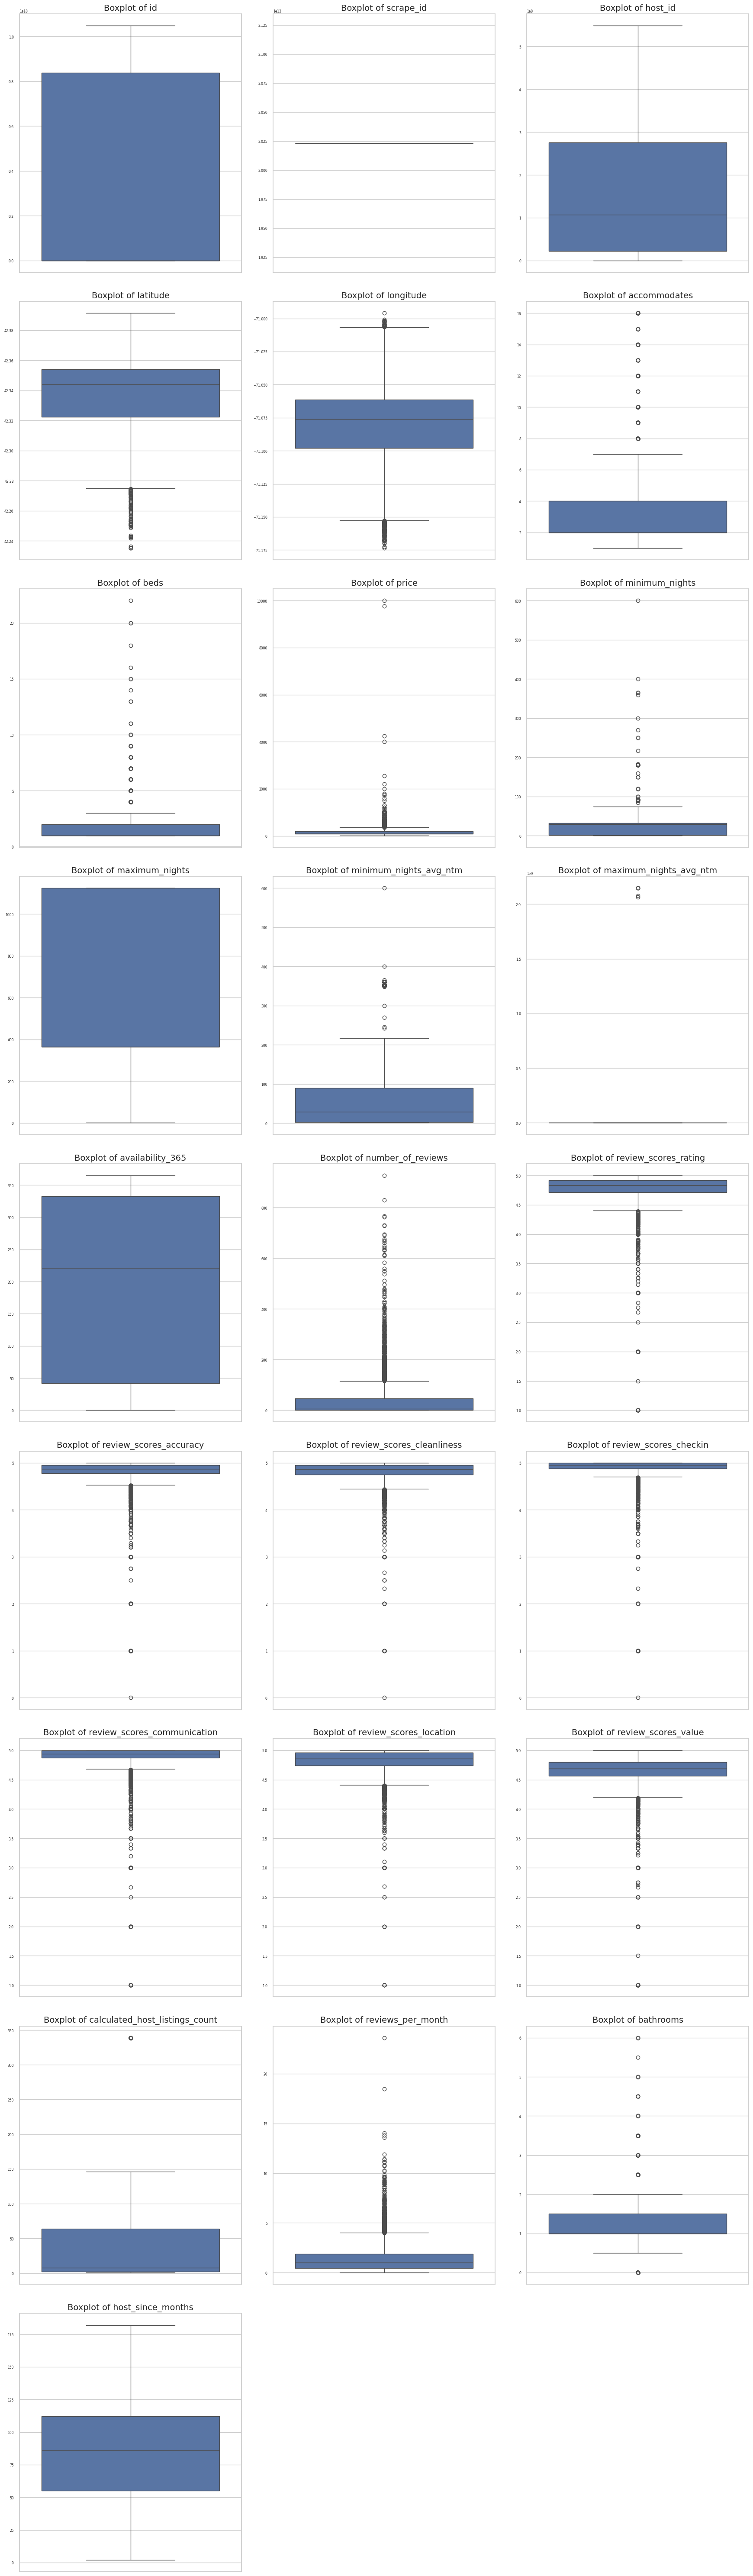

In [269]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(nrows=len(df_listings.columns) // 3, ncols=3, figsize=(18, 100))  # Adjust the size as needed
fig.tight_layout(pad=5.0)

axes = axes.flatten()

for i, col in enumerate(df_listings.select_dtypes(include=['float64', 'int64']).columns):
    sns.boxplot(y=col, data=df_listings, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

for ax in axes[len(df_listings.select_dtypes(include=['float64', 'int64']).columns):]:
    ax.set_visible(False)

plt.show()

From the study of this set of pair plots, we find out that there are many outliers. The following cleaning steps are done based on our study of the dataset.

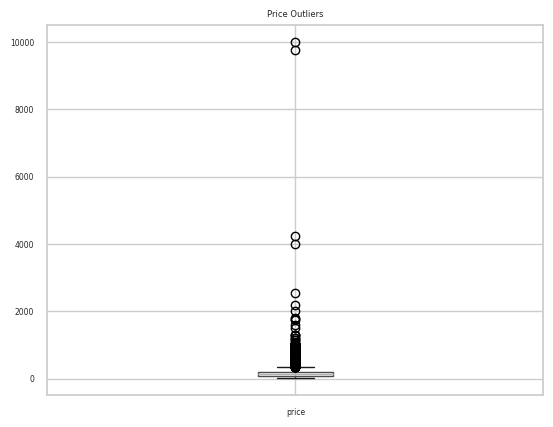

In [270]:
df_listings.boxplot(column='price')
plt.title('Price Outliers')
plt.show()

In [271]:
q995 = df_listings['price'].quantile(0.995)
outliers = df_listings[df_listings['price'] > q995]
print(outliers['price'])

488      3999.0
616      1600.0
800      1150.0
891      4245.0
1146     1200.0
1184     2557.0
1373    10000.0
1945     1293.0
2783     2200.0
2829     1500.0
2894     1729.0
2900     1300.0
2952     1300.0
2956     1200.0
3191     1159.0
3281     1100.0
3282     1800.0
3584     1758.0
3589     9770.0
3819     2000.0
Name: price, dtype: float64


In [272]:
df_listings = df_listings[df_listings['price'] <= q995]

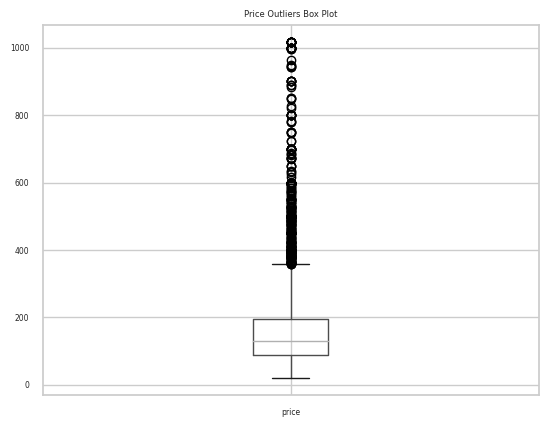

In [273]:
df_listings.boxplot(column='price')
plt.title('Price Outliers Box Plot')
plt.show()

Upon reviewing the dataset, we identified an outlier, specifically a listing priced at $10,000. This appears to be an anomaly likely caused by an input error or a deliberate attempt to skew the Airbnb data. To maintain the integrity of our analysis, we have decided to cap the dataset at the 99.5th percentile, effectively removing such extreme data points and ensuring a more accurate representation of the market.

In [274]:
unknown_neighborhood_overview = df_listings['neighborhood_overview'].value_counts().get("Unknown", 0)
unknown_host_about = df_listings['host_about'].value_counts().get("Unknown", 0)

total_unknowns = unknown_neighborhood_overview + unknown_host_about
print(f"Number of 'Unknown' in 'neighborhood_overview': {unknown_neighborhood_overview}")
print(f"Number of 'Unknown' in 'host_about': {unknown_host_about}")
print(f"Total 'Unknown' values in both columns: {total_unknowns}")

Number of 'Unknown' in 'neighborhood_overview': 1453
Number of 'Unknown' in 'host_about': 1233
Total 'Unknown' values in both columns: 2686


In [275]:
df_listings = df_listings[
    (df_listings['neighborhood_overview'] != "Unknown") &
    (df_listings['host_about'] != "Unknown")
]

In [276]:
df_listings

,id,scrape_id,name,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,reviews_per_month,bathrooms,host_since_months,highly_rated
0,3781,20231218233145,Rental unit in Boston · ★4.96 · 1 bedroom · 1 ...,"Mostly quiet ( no loud music, no crowed sidewa...",4804,2008/12/03,My wife and I and grown children frequently oc...,within a day,90%,29%,...,4.96,4.88,4.92,Unknown,f,1,0.23,1.0,182,True
1,5506,20231218233145,Guest suite in Boston · ★4.79 · 1 bedroom · 1 ...,"Peaceful, Architecturally interesting, histori...",8229,2009/02/19,"Relaxed, Easy going, Accommodating.",within an hour,100%,100%,...,4.89,4.55,4.75,STR-490093,f,10,0.68,1.0,180,False
2,6695,20231218233145,Condo in Boston · ★4.81 · Studio · 2 beds · 1 ...,"Peaceful, Architecturally interesting, histori...",8229,2009/02/19,"Relaxed, Easy going, Accommodating.",within an hour,100%,100%,...,4.95,4.51,4.71,STR-491702,f,10,0.73,1.0,180,False
3,8789,20231218233145,Rental unit in Boston · ★4.67 · 1 bedroom · 1 ...,Beacon Hill is a historic neighborhood filled ...,26988,2009/07/22,I manage a number of furnished units around Bo...,within a day,90%,50%,...,4.96,4.96,4.56,Unknown,f,9,0.24,1.0,175,False
6,18711,20231218233145,Rental unit in Boston · ★4.31 · 3 bedrooms · 3...,"Once its own city, Dorchester is now Boston’s ...",71783,2010/01/19,"Lance R. Swank, Principal\r\n\r\nHis units off...",a few days or more,40%,95%,...,4.46,4.24,4.48,Unknown,f,27,0.31,1.0,169,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,1045997580495005942,20231218233145,Rental unit in Boston · ★New · 1 bedroom · 1 b...,Experience the best of Boston at Maverick Suit...,22348222,2014/10/09,"Welcome to our profile, and allow us to introd...",within an hour,98%,99%,...,4.94,4.86,4.69,STR-540399,t,87,1.01,1.0,112,False
4196,1046356755567106626,20231218233145,Rental unit in Boston · ★New · Studio · 1 bed ...,This apartment is located on the southeastern ...,275849638,2019/07/13,Healing Homes of Boston's mission is to provid...,within an hour,100%,100%,...,4.94,4.86,4.69,Exempt: This listing is a unit that has contra...,t,71,1.01,1.0,55,False
4197,1046470991404568874,20231218233145,Rental unit in Boston · ★New · Studio · 1 bed ...,This apartment is located on the southeastern ...,365116307,2020/08/30,Healing Homes of Boston's mission it to provid...,within an hour,100%,100%,...,4.94,4.86,4.69,Exempt: This listing is a unit that has contra...,f,64,1.01,1.0,41,False
4198,1046490108856067836,20231218233145,Rental unit in Boston · ★New · Studio · 1 bed ...,This apartment is located on the southeastern ...,365116307,2020/08/30,Healing Homes of Boston's mission it to provid...,within an hour,100%,100%,...,4.94,4.86,4.69,Exempt: This listing is a unit that has contra...,t,64,1.01,1.0,41,False


As we can see, there are more than 2000 "Unknown" which will not provide us with any insights. The decision is to drop all "Unknown".

In [277]:
exclude_columns = ['id', 'scrape_id', 'host_id']
numerical_columns_for_description = [col for col in num_fill if col not in exclude_columns]

description_filtered = df_listings[numerical_columns_for_description].describe()
description_filtered

,latitude,longitude,accommodates,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,bathrooms,host_since_months
count,2153.000000,2153.000000,2153.00000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2.153000e+03,2153.000000,...,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000
mean,42.337255,-71.081267,3.13516,1.749187,166.272178,25.053414,646.233163,76.238830,9.592663e+05,200.692987,...,4.784036,4.771760,4.854459,4.840595,4.786535,4.597678,76.723641,1.646363,1.220390,88.969810
std,0.024804,0.028824,2.23541,1.545253,124.244308,31.651395,448.080180,123.938752,4.447282e+07,135.879259,...,0.357120,0.351937,0.365210,0.362143,0.317775,0.434087,117.701908,1.668771,0.550716,38.229406
min,42.235330,-71.170070,1.00000,1.000000,26.000000,1.000000,2.000000,1.000000,2.000000e+00,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,4.000000
25%,42.326030,-71.094010,2.00000,1.000000,91.000000,2.000000,360.000000,2.600000,3.650000e+02,69.000000,...,4.780000,4.760000,4.880000,4.870000,4.750000,4.540000,3.000000,0.640000,1.000000,56.000000
50%,42.343680,-71.076330,2.00000,1.000000,129.000000,29.000000,365.000000,29.000000,1.125000e+03,231.000000,...,4.870000,4.860000,4.940000,4.940000,4.860000,4.690000,19.000000,1.010000,1.000000,86.000000
75%,42.351870,-71.061930,4.00000,2.000000,199.000000,32.000000,1125.000000,91.000000,1.125000e+03,331.000000,...,4.950000,4.950000,4.980000,4.980000,4.960000,4.800000,74.000000,2.150000,1.000000,115.000000
max,42.390720,-71.003760,16.00000,20.000000,1000.000000,365.000000,1125.000000,365.000000,2.063559e+09,365.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,339.000000,11.410000,6.000000,182.000000


In [278]:
num_column=['host_since_months','host_response_rate','host_acceptance_rate','latitude','longitude','price','minimum_nights_avg_ntm','maximum_nights_avg_ntm','number_of_reviews','review_scores_rating','reviews_per_month']
cate_column=['host_response_time','host_is_superhost','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','room_type','accommodates','beds','has_availability','availability_365','bathrooms','highly_rated']
text_column=['id','neighborhood_overview','host_about']
df_num = df_listings[num_column]
df_cate = df_listings[cate_column]
df_text = df_listings[text_column]

Sepreate numerical, categorical and text columns.

In [279]:
num_colum=pd.DataFrame(df_num)
num_colum

,host_since_months,host_response_rate,host_acceptance_rate,latitude,longitude,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,review_scores_rating,reviews_per_month
0,182,90%,29%,42.364130,-71.029910,125.0,29.0,1125.0,24,4.96,0.23
1,180,100%,100%,42.328440,-71.095810,135.0,3.0,1125.0,122,4.79,0.68
2,180,100%,100%,42.328020,-71.093870,179.0,3.0,730.0,127,4.81,0.73
3,175,90%,50%,42.358670,-71.063070,91.0,91.0,365.0,27,4.67,0.24
6,169,40%,95%,42.322120,-71.060960,139.0,30.0,1125.0,52,4.31,0.31
...,...,...,...,...,...,...,...,...,...,...,...
4194,112,98%,99%,42.344775,-71.089708,64.0,2.3,365.0,0,4.83,1.01
4196,55,100%,100%,42.342861,-71.082917,72.0,3.2,365.0,0,4.83,1.01
4197,41,100%,100%,42.341960,-71.082440,72.0,3.2,365.0,0,4.83,1.01
4198,41,100%,100%,42.343800,-71.083930,88.0,3.2,365.0,0,4.83,1.01


Turn percentage to decimals

In [280]:
num_colum['host_response_rate'] = num_colum['host_response_rate'].str.replace('%', '').astype(float) / 100
num_colum['host_acceptance_rate'] = num_colum['host_acceptance_rate'].str.replace('%', '').astype(float) / 100
num_colum[['host_acceptance_rate']].head()

,host_acceptance_rate
0,0.29
1,1.00
2,1.00
3,0.50
6,0.95


In [281]:
num_colum[['host_response_rate']].head()

,host_response_rate
0,0.9
1,1.0
2,1.0
3,0.9
6,0.4


In [282]:
num_colum

,host_since_months,host_response_rate,host_acceptance_rate,latitude,longitude,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,review_scores_rating,reviews_per_month
0,182,0.90,0.29,42.364130,-71.029910,125.0,29.0,1125.0,24,4.96,0.23
1,180,1.00,1.00,42.328440,-71.095810,135.0,3.0,1125.0,122,4.79,0.68
2,180,1.00,1.00,42.328020,-71.093870,179.0,3.0,730.0,127,4.81,0.73
3,175,0.90,0.50,42.358670,-71.063070,91.0,91.0,365.0,27,4.67,0.24
6,169,0.40,0.95,42.322120,-71.060960,139.0,30.0,1125.0,52,4.31,0.31
...,...,...,...,...,...,...,...,...,...,...,...
4194,112,0.98,0.99,42.344775,-71.089708,64.0,2.3,365.0,0,4.83,1.01
4196,55,1.00,1.00,42.342861,-71.082917,72.0,3.2,365.0,0,4.83,1.01
4197,41,1.00,1.00,42.341960,-71.082440,72.0,3.2,365.0,0,4.83,1.01
4198,41,1.00,1.00,42.343800,-71.083930,88.0,3.2,365.0,0,4.83,1.01


In [283]:
columns_temp_drop = ['latitude','longitude']
num_graph = num_colum.drop(columns=columns_temp_drop)
num_graph = pd.DataFrame(num_graph)
num_graph

,host_since_months,host_response_rate,host_acceptance_rate,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,review_scores_rating,reviews_per_month
0,182,0.90,0.29,125.0,29.0,1125.0,24,4.96,0.23
1,180,1.00,1.00,135.0,3.0,1125.0,122,4.79,0.68
2,180,1.00,1.00,179.0,3.0,730.0,127,4.81,0.73
3,175,0.90,0.50,91.0,91.0,365.0,27,4.67,0.24
6,169,0.40,0.95,139.0,30.0,1125.0,52,4.31,0.31
...,...,...,...,...,...,...,...,...,...
4194,112,0.98,0.99,64.0,2.3,365.0,0,4.83,1.01
4196,55,1.00,1.00,72.0,3.2,365.0,0,4.83,1.01
4197,41,1.00,1.00,72.0,3.2,365.0,0,4.83,1.01
4198,41,1.00,1.00,88.0,3.2,365.0,0,4.83,1.01


Drop "latitude" and "longitude" because we do not want to use them for correlation analysis.

Normalize the data.

In [284]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler(feature_range=(0, 1))
num_graph_normalized = scaler.fit_transform(num_graph)
num_graph_normalized = pd.DataFrame(num_graph_normalized, columns=num_graph.columns)
num_graph_normalized.head()

,host_since_months,host_response_rate,host_acceptance_rate,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,review_scores_rating,reviews_per_month
0,1.000000,0.9,0.29,0.101643,0.076923,5.442054e-07,0.025890,0.9900,0.019298
1,0.988764,1.0,1.00,0.111910,0.005495,5.442054e-07,0.131607,0.9475,0.058772
2,0.988764,1.0,1.00,0.157084,0.005495,3.527885e-07,0.137001,0.9525,0.063158
3,0.960674,0.9,0.50,0.066735,0.247253,1.759097e-07,0.029126,0.9175,0.020175
4,0.926966,0.4,0.95,0.116016,0.079670,5.442054e-07,0.056095,0.8275,0.026316


In [285]:
num_graph_normalized

,host_since_months,host_response_rate,host_acceptance_rate,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,review_scores_rating,reviews_per_month
0,1.000000,0.90,0.29,0.101643,0.076923,5.442054e-07,0.025890,0.9900,0.019298
1,0.988764,1.00,1.00,0.111910,0.005495,5.442054e-07,0.131607,0.9475,0.058772
2,0.988764,1.00,1.00,0.157084,0.005495,3.527885e-07,0.137001,0.9525,0.063158
3,0.960674,0.90,0.50,0.066735,0.247253,1.759097e-07,0.029126,0.9175,0.020175
4,0.926966,0.40,0.95,0.116016,0.079670,5.442054e-07,0.056095,0.8275,0.026316
...,...,...,...,...,...,...,...,...,...
2148,0.606742,0.98,0.99,0.039014,0.003571,1.759097e-07,0.000000,0.9575,0.087719
2149,0.286517,1.00,1.00,0.047228,0.006044,1.759097e-07,0.000000,0.9575,0.087719
2150,0.207865,1.00,1.00,0.047228,0.006044,1.759097e-07,0.000000,0.9575,0.087719
2151,0.207865,1.00,1.00,0.063655,0.006044,1.759097e-07,0.000000,0.9575,0.087719


### **Heatmap**

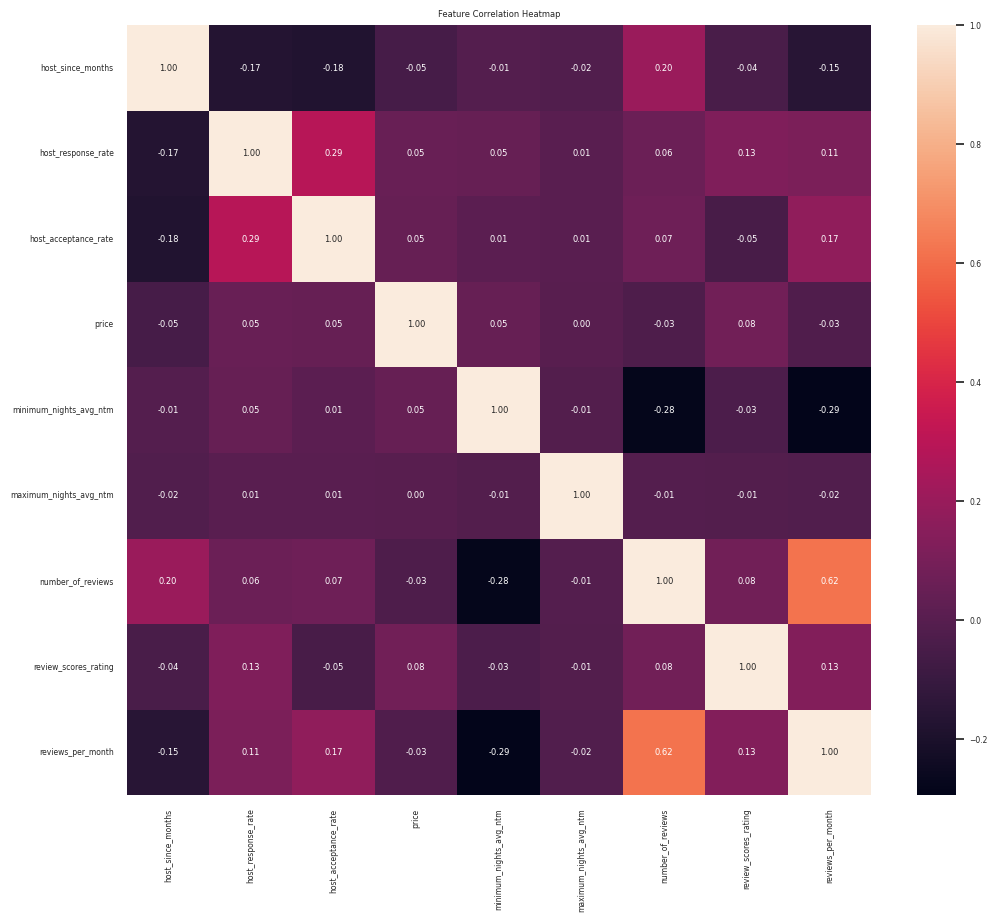

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = num_graph_normalized.corr()

# Draw the heatmap
plt.figure(figsize=(12, 10))  # You can adjust the size of the figure here
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

There are too many attributes and data points for us to run pairplot with over 500 random samples. Therefore, we decide not to use specific attributes to run cluster, but to use PCA to achieve dimension reduction.

### **Pairplot**

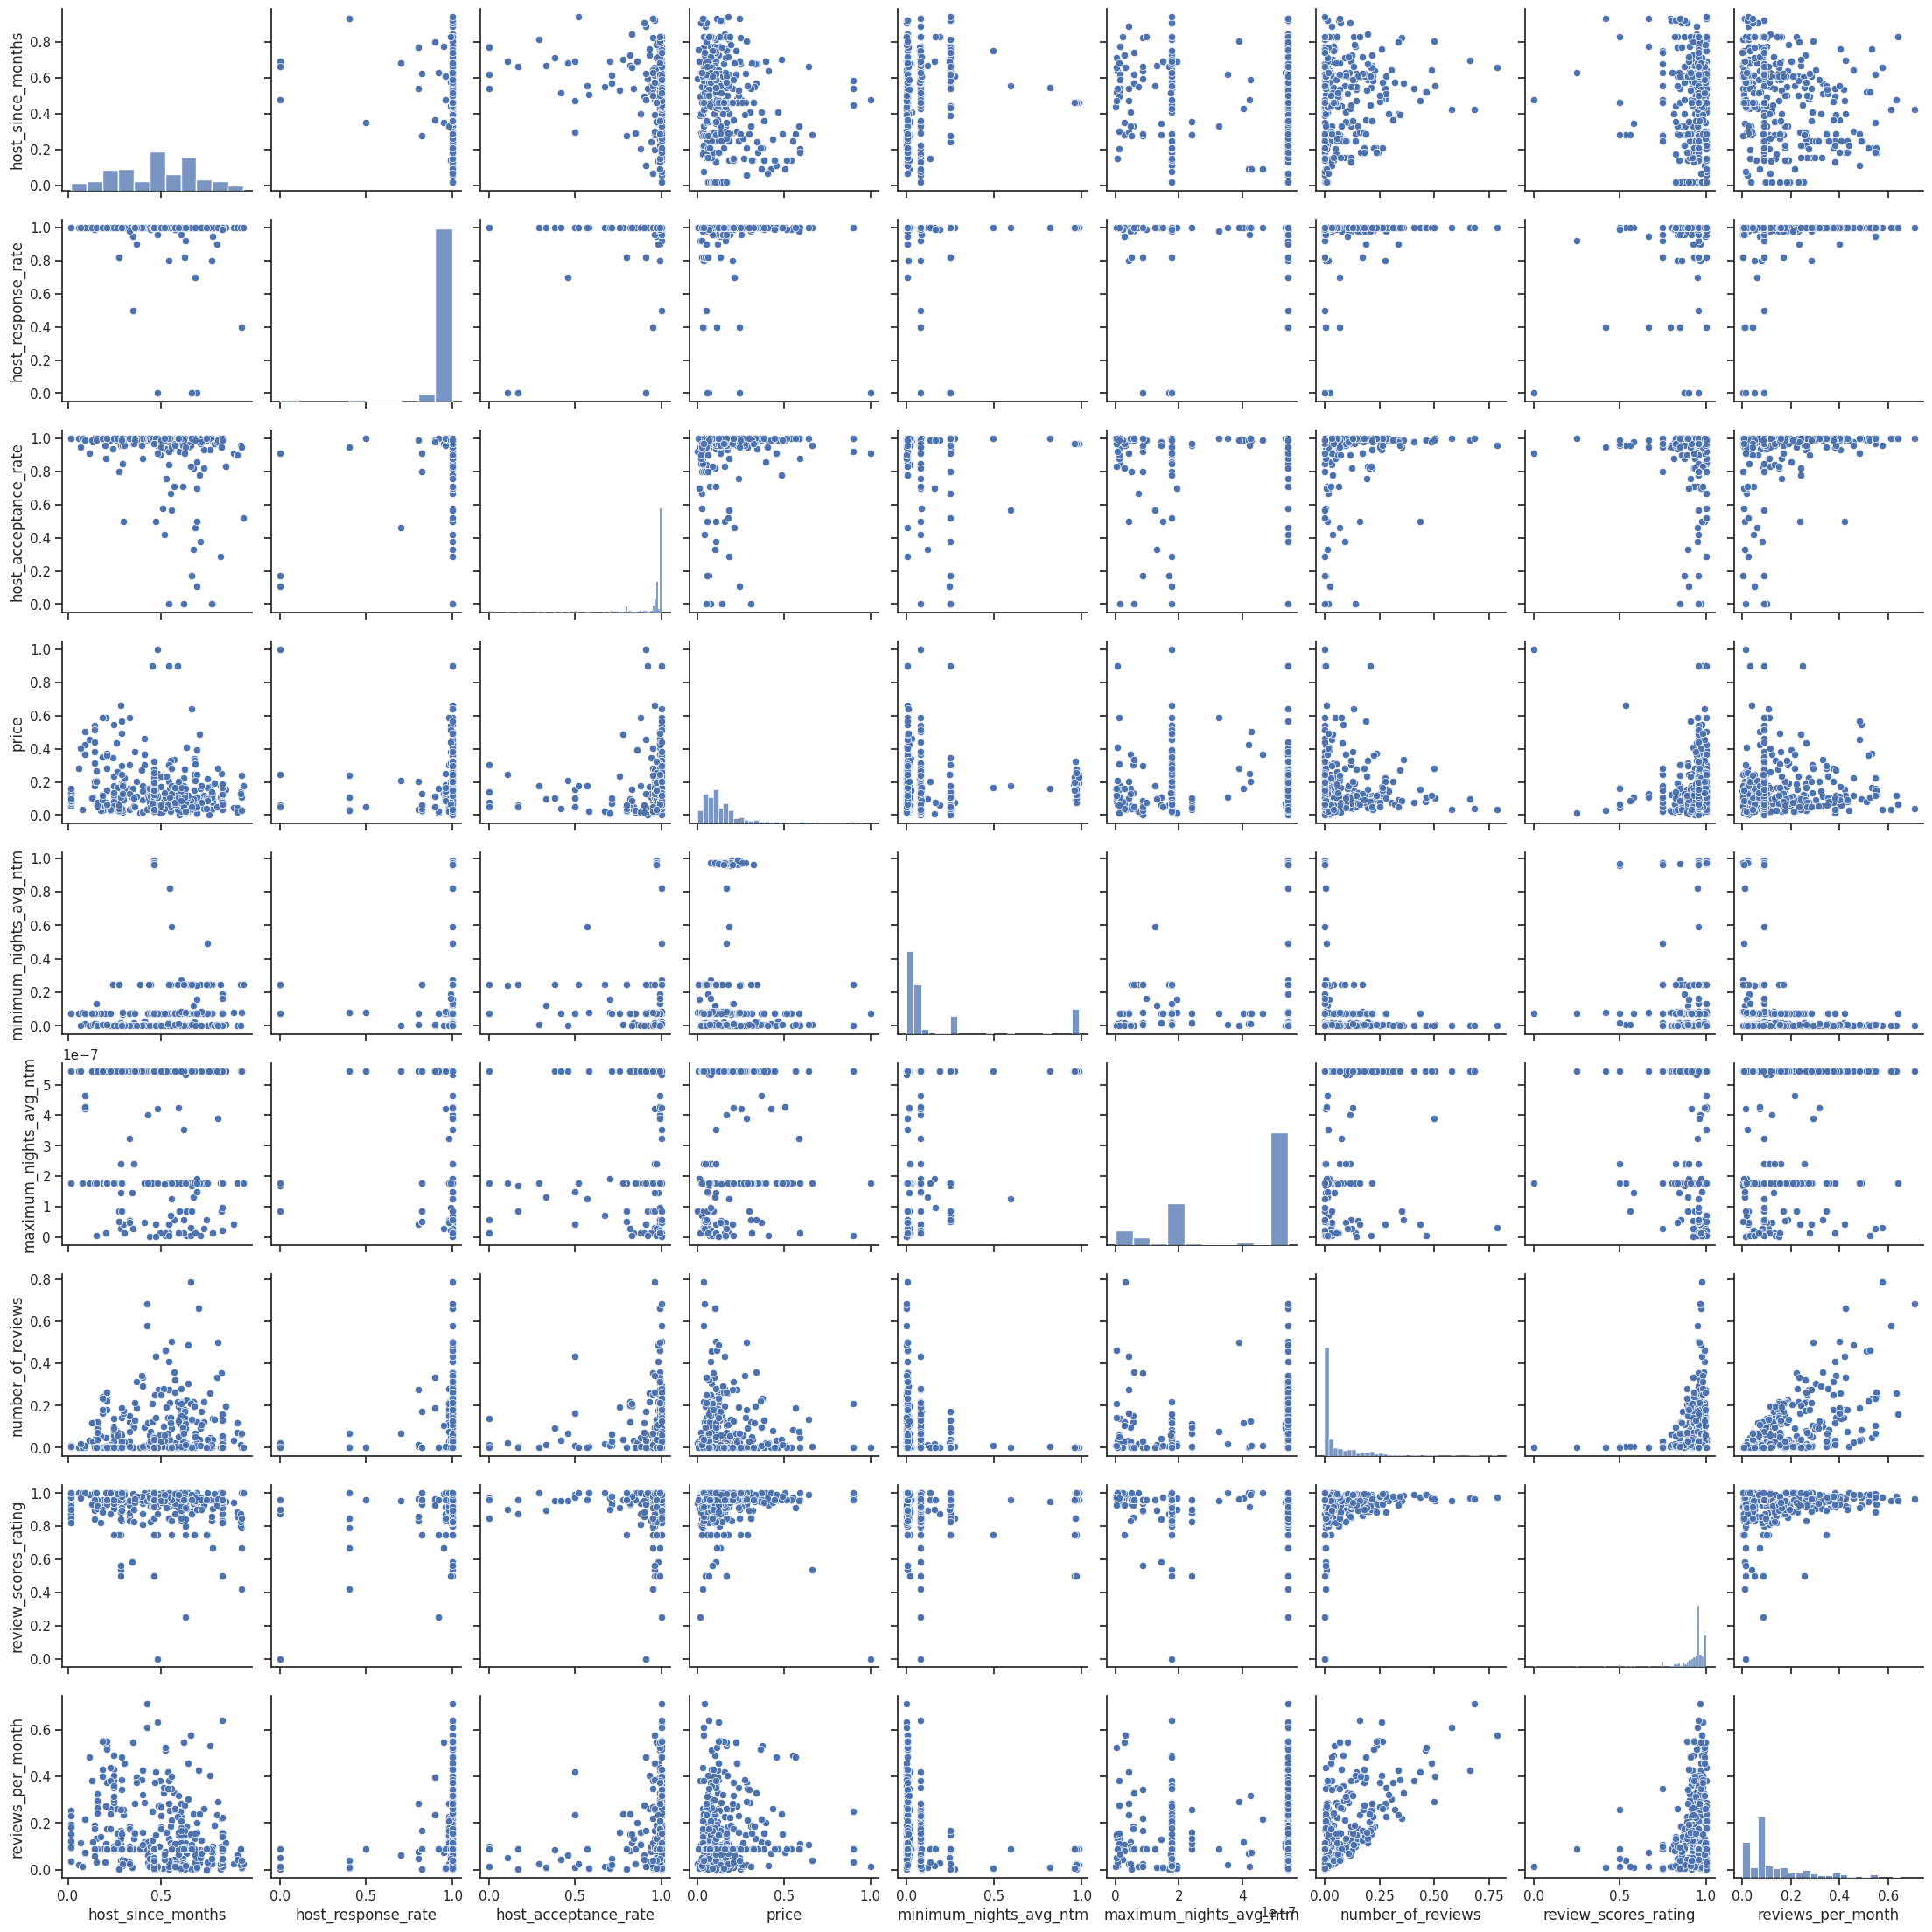

In [287]:
sampled_df = num_graph_normalized.sample(n=450, random_state=42)
sns.set(style="ticks", color_codes=True)
pair_plot = sns.pairplot(sampled_df)
# plt.savefig("pairplot_sampled.png")

plt.show()

### **Categorical data manipulation**

In [288]:
unique = df_cate.apply(lambda col: col.unique())
pd.DataFrame(unique)

,0
host_response_time,"[within a day, within an hour, a few days or m..."
host_is_superhost,"[t, f]"
host_has_profile_pic,[t]
host_identity_verified,"[f, t]"
neighbourhood_cleansed,"[East Boston, Roxbury, Beacon Hill, Dorchester..."
room_type,"[Entire home/apt, Private room, Shared room]"
accommodates,"[2, 4, 7, 3, 1, 6, 9, 5, 10, 8, 12, 16, 11, 14..."
beds,"[1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 9.0, 6.0, 8.0, ..."
has_availability,"[t, f]"
availability_365,"[271, 87, 107, 237, 245, 2, 282, 259, 179, 104..."


In [289]:
df_listings.drop(columns=['host_has_profile_pic'], inplace=True)

In [290]:
df_cate

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,beds,has_availability,availability_365,bathrooms,highly_rated
0,within a day,t,t,f,East Boston,Entire home/apt,2,1.0,t,271,1.0,True
1,within an hour,t,t,t,Roxbury,Entire home/apt,2,1.0,t,87,1.0,False
2,within an hour,t,t,t,Roxbury,Entire home/apt,4,2.0,t,107,1.0,False
3,within a day,t,t,t,Beacon Hill,Entire home/apt,2,1.0,t,237,1.0,False
6,a few days or more,f,t,t,Dorchester,Entire home/apt,7,3.0,t,245,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4194,within an hour,f,t,t,Fenway,Entire home/apt,2,1.0,t,348,1.0,False
4196,within an hour,f,t,t,Back Bay,Entire home/apt,2,1.0,t,251,1.0,False
4197,within an hour,t,t,t,South End,Entire home/apt,2,1.0,t,270,1.0,False
4198,within an hour,t,t,t,Back Bay,Entire home/apt,2,1.0,t,270,1.0,False


In [291]:
df_cate = df_cate.astype('category')
df_cate['host_is_superhost'].cat.categories

Index(['f', 't'], dtype='object')

In [292]:
for c in df_cate.columns:
  df_cate[c] = df_cate[c].cat.codes
df_cate

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,beds,has_availability,availability_365,bathrooms,highly_rated
0,1,1,0,0,9,0,1,0,1,241,1,1
1,3,1,0,1,19,0,1,0,1,77,1,0
2,3,1,0,1,19,0,3,1,1,94,1,0
3,1,1,0,1,3,0,1,0,1,208,1,0
6,0,0,0,1,7,0,6,2,1,216,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4194,3,0,0,1,10,0,1,0,1,318,1,0
4196,3,0,0,1,1,0,1,0,1,222,1,0
4197,3,1,0,1,22,0,1,0,1,240,1,0
4198,3,1,0,1,1,0,1,0,1,240,1,0


In [293]:
df_cate=df_cate.reset_index(drop=True)
df_cate

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,beds,has_availability,availability_365,bathrooms,highly_rated
0,1,1,0,0,9,0,1,0,1,241,1,1
1,3,1,0,1,19,0,1,0,1,77,1,0
2,3,1,0,1,19,0,3,1,1,94,1,0
3,1,1,0,1,3,0,1,0,1,208,1,0
4,0,0,0,1,7,0,6,2,1,216,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2148,3,0,0,1,10,0,1,0,1,318,1,0
2149,3,0,0,1,1,0,1,0,1,222,1,0
2150,3,1,0,1,22,0,1,0,1,240,1,0
2151,3,1,0,1,1,0,1,0,1,240,1,0


combine all dataframes

In [294]:
df_listings_corrected = pd.concat([num_graph_normalized, df_cate], axis=1)
df_listings_corrected

,host_since_months,host_response_rate,host_acceptance_rate,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,review_scores_rating,reviews_per_month,host_response_time,...,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,beds,has_availability,availability_365,bathrooms,highly_rated
0,1.000000,0.90,0.29,0.101643,0.076923,5.442054e-07,0.025890,0.9900,0.019298,1,...,0,0,9,0,1,0,1,241,1,1
1,0.988764,1.00,1.00,0.111910,0.005495,5.442054e-07,0.131607,0.9475,0.058772,3,...,0,1,19,0,1,0,1,77,1,0
2,0.988764,1.00,1.00,0.157084,0.005495,3.527885e-07,0.137001,0.9525,0.063158,3,...,0,1,19,0,3,1,1,94,1,0
3,0.960674,0.90,0.50,0.066735,0.247253,1.759097e-07,0.029126,0.9175,0.020175,1,...,0,1,3,0,1,0,1,208,1,0
4,0.926966,0.40,0.95,0.116016,0.079670,5.442054e-07,0.056095,0.8275,0.026316,0,...,0,1,7,0,6,2,1,216,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,0.606742,0.98,0.99,0.039014,0.003571,1.759097e-07,0.000000,0.9575,0.087719,3,...,0,1,10,0,1,0,1,318,1,0
2149,0.286517,1.00,1.00,0.047228,0.006044,1.759097e-07,0.000000,0.9575,0.087719,3,...,0,1,1,0,1,0,1,222,1,0
2150,0.207865,1.00,1.00,0.047228,0.006044,1.759097e-07,0.000000,0.9575,0.087719,3,...,0,1,22,0,1,0,1,240,1,0
2151,0.207865,1.00,1.00,0.063655,0.006044,1.759097e-07,0.000000,0.9575,0.087719,3,...,0,1,1,0,1,0,1,240,1,0


### **PCA**

<Axes: >

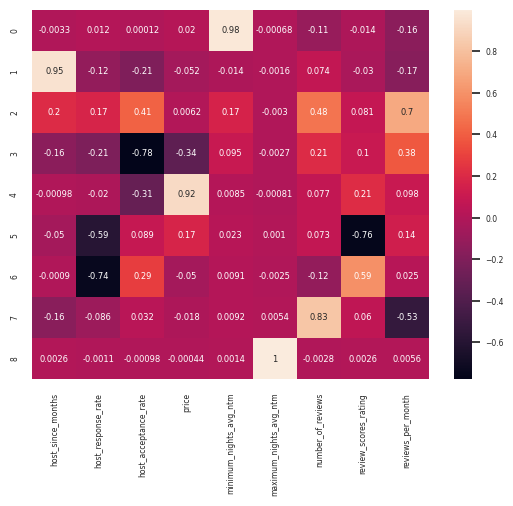

In [295]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(num_graph_normalized)
pca.components_.shape

df_components = pd.DataFrame(pca.components_, columns = num_graph_normalized.columns)

import seaborn as sns
sns.set(font_scale=0.5)
sns.heatmap(df_components, annot=True, )

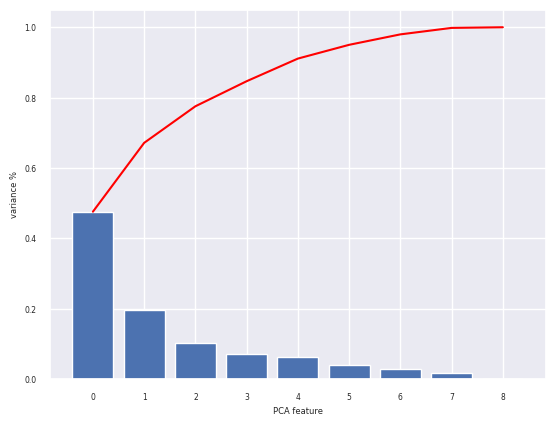

In [296]:
import matplotlib.pyplot as plt
component_ids = range(pca.n_components_)
plt.bar(component_ids, pca.explained_variance_ratio_)
plt.plot(component_ids, np.cumsum(pca.explained_variance_ratio_), color='red')
plt.xticks(component_ids)
plt.ylabel('variance %')
plt.xlabel('PCA feature')
plt.show()

In [297]:
import numpy as np
import plotly.express as px

fig = px.line(pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)))
fig.show()

By using scree plot, in order to contain 84% variance, we decide to use 3 components.

In [315]:
df_numeric_corrected_transformed_3D = pd.DataFrame(pca.transform(num_graph_normalized)[:, 0:3], columns=['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(df_numeric_corrected_transformed_3D, x='PC1', y='PC2', z='PC3',)
fig.update_traces(marker_size = 3)
fig.show()

In [316]:
df_numeric_corrected_transformed_3D_with_targets = pd.concat([df_numeric_corrected_transformed_3D, df_listings_corrected['highly_rated']], axis=1)

fig = px.scatter_3d(df_numeric_corrected_transformed_3D_with_targets, x='PC1', y='PC2', z='PC3', color='highly_rated')
fig.update_traces(marker_size = 3)
fig.show()

### **TSNE**

In [310]:
df_cate1 = df_cate.drop(['highly_rated'], axis=1)

In [311]:
from sklearn.manifold import TSNE

tsne_embedding = TSNE(n_components=3).fit_transform(num_graph_normalized)
df_embeddings_with_categorical_and_targets = pd.concat([pd.DataFrame(tsne_embedding, columns=['tSNE1', 'tSNE2', 'tSNE3']), df_cate1 , df_listings_corrected['highly_rated']], axis=1)

In [312]:
df_embeddings_with_categorical_and_targets

,tSNE1,tSNE2,tSNE3,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,beds,has_availability,availability_365,bathrooms,highly_rated
0,-6.907408,15.952625,-4.373163,1,1,0,0,9,0,1,0,1,241,1,1
1,-0.688897,14.069237,2.437490,3,1,0,1,19,0,1,0,1,77,1,0
2,-0.749308,13.931498,2.481732,3,1,0,1,19,0,3,1,1,94,1,0
3,-5.958447,16.044836,-3.848424,1,1,0,1,3,0,1,0,1,208,1,0
4,2.497199,16.588488,-7.312324,0,0,0,1,7,0,6,2,1,216,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,3.481288,4.611122,2.160017,3,0,0,1,10,0,1,0,1,318,1,0
2149,0.313475,-9.072347,-4.822693,3,0,0,1,1,0,1,0,1,222,1,0
2150,-1.824703,-14.185283,-3.202046,3,1,0,1,22,0,1,0,1,240,1,0
2151,-2.208524,-13.500484,-3.255249,3,1,0,1,1,0,1,0,1,240,1,0


In [313]:
df_targets = pd.DataFrame(df_listings_corrected['highly_rated'])

In [314]:
color_column = 'highly_rated'
hover_columns = df_cate.columns | df_targets.columns
fig = px.scatter_3d(df_embeddings_with_categorical_and_targets, x='tSNE1', y='tSNE2', z='tSNE3', color=color_column, hover_data=hover_columns)
fig.update_traces(marker_size = 3)
fig.show()

<ipython-input-314-765ab8c0d2f5>:2: FutureWarning:

Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.



### **Text Preprocessing**

Below, we conduct text preprocessing steps on review dataset.

In [300]:
!pip3 install nltk spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 21.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [301]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [302]:
df_reviews['comments'] = pd.DataFrame(df_reviews.comments.str.lower())
df_reviews['comments'] = pd.DataFrame(df_reviews.comments.str.strip())
df_reviews['comments'] = pd.DataFrame(df_reviews.comments.str.replace('[^\w\s]',''))

<ipython-input-302-0804415140ae>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-302-0804415140ae>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-302-0804415140ae>:3: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-302-0804415140ae>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [303]:
def process_text(text):
  tokens = word_tokenize(text)
  return tokens

In [304]:
df_reviews['tokenized_comments'] = df_reviews['comments'].astype(str).apply(process_text)

<ipython-input-304-c3824e25f5fc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [305]:
df_reviews['tokenized_comments']

0         [the, apartment, was, as, advertised, and, fra...
1         [it, was, a, pleasure, to, stay, at, franks, p...
2         [the, apartment, description, is, entirely, fa...
3         [thoroughly, enjoyed, my, time, at, franks, ho...
4         [great, value, for, the, money, this, location...
                                ...                        
182477    [a, wonderful, location, to, walk, around, the...
182478                [great, deal, and, responsive, hosts]
182479    [our, stay, at, diegos, place, was, greatbrthe...
182480    [good, place, solid, bedroomsbathrooms, nice, ...
182481    [great, host, great, home, and, amazing, service]
Name: tokenized_comments, Length: 174487, dtype: object

Here is text preprocessing steps for listing dataset.

In [306]:
df_text['neighborhood_overview'] = pd.DataFrame(df_text.neighborhood_overview.str.lower())
df_text['neighborhood_overview'] = pd.DataFrame(df_text.neighborhood_overview.str.strip())
df_text['neighborhood_overview'] = pd.DataFrame(df_text.neighborhood_overview.str.replace('[^\w\s]',''))

<ipython-input-306-b50e6eb916aa>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-306-b50e6eb916aa>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-306-b50e6eb916aa>:3: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-306-b50e6eb916aa>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [307]:
df_text['host_about'] = pd.DataFrame(df_text.host_about.str.lower())
df_text['host_about'] = pd.DataFrame(df_text.host_about.str.strip())
df_text['host_about'] = pd.DataFrame(df_text.host_about.str.replace('[^\w\s]',''))

<ipython-input-307-e86aa88ff6cd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-307-e86aa88ff6cd>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-307-e86aa88ff6cd>:3: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-307-e86aa88ff6cd>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [308]:
df_text['tokenized_neighborhood_overview'] = df_text['neighborhood_overview'].astype(str).apply(process_text)
df_text['tokenized_host_about'] = df_text['host_about'].astype(str).apply(process_text)

<ipython-input-308-224f7445555d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-308-224f7445555d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [309]:
df_text.head()

,id,neighborhood_overview,host_about,tokenized_neighborhood_overview,tokenized_host_about
0,3781,mostly quiet no loud music no crowed sidewalk...,my wife and i and grown children frequently oc...,"[mostly, quiet, no, loud, music, no, crowed, s...","[my, wife, and, i, and, grown, children, frequ..."
1,5506,peaceful architecturally interesting historic ...,relaxed easy going accommodating,"[peaceful, architecturally, interesting, histo...","[relaxed, easy, going, accommodating]"
2,6695,peaceful architecturally interesting historic ...,relaxed easy going accommodating,"[peaceful, architecturally, interesting, histo...","[relaxed, easy, going, accommodating]"
3,8789,beacon hill is a historic neighborhood filled ...,i manage a number of furnished units around bo...,"[beacon, hill, is, a, historic, neighborhood, ...","[i, manage, a, number, of, furnished, units, a..."
6,18711,once its own city dorchester is now bostons la...,lance r swank principal\r\n\r\nhis units offer...,"[once, its, own, city, dorchester, is, now, bo...","[lance, r, swank, principal, his, units, offer..."


We have carried out a number of actions to clean and standardize our textual data during the text preprocessing phase, such as changing strings to lowercase, removing punctuation, and trimming whitespace. Tokenized versions of our remarks, neighborhood summaries, and host descriptions are produced by these procedures. Set the stage for upcoming sentiment and other analyses within our dataset.